### Thallys Oliveira - 11819827

Questão 6 - Lista 3

In [27]:
import urllib.request

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2023/raw/main/imagens/pratica_03/A.png", "A.png")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2023/raw/main/imagens/pratica_03/B.png", "B.png")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2023/raw/main/imagens/pratica_03/coins.jpg", "coins.jpg")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2023/raw/main/imagens/pratica_03/shapes.png", "shapes.png")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")


try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2023/raw/main/imagens/pratica_03/shapes_resultado.png", "shapes_resultado.png")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2023/raw/main/imagens/pratica_03/texto.png", "texto.png")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2023/raw/main/imagens/pratica_03/elefante.tif", "elefante.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2023/raw/main/imagens/pratica_03/card1.jpg", "card1.jpg")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2023/raw/main/imagens/pratica_03/card2.png", "card2.png")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2023/raw/main/imagens/pratica_03/card3.png", "card3.png")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2023/raw/main/imagens/pratica_03/card4.jpg", "card4.jpg")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2023/raw/main/imagens/pratica_03/ocr_a_reference.png", "ocr_a_reference.png")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2023/raw/main/imagens/pratica_03/ocr_functions.py", "ocr_functions.py")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

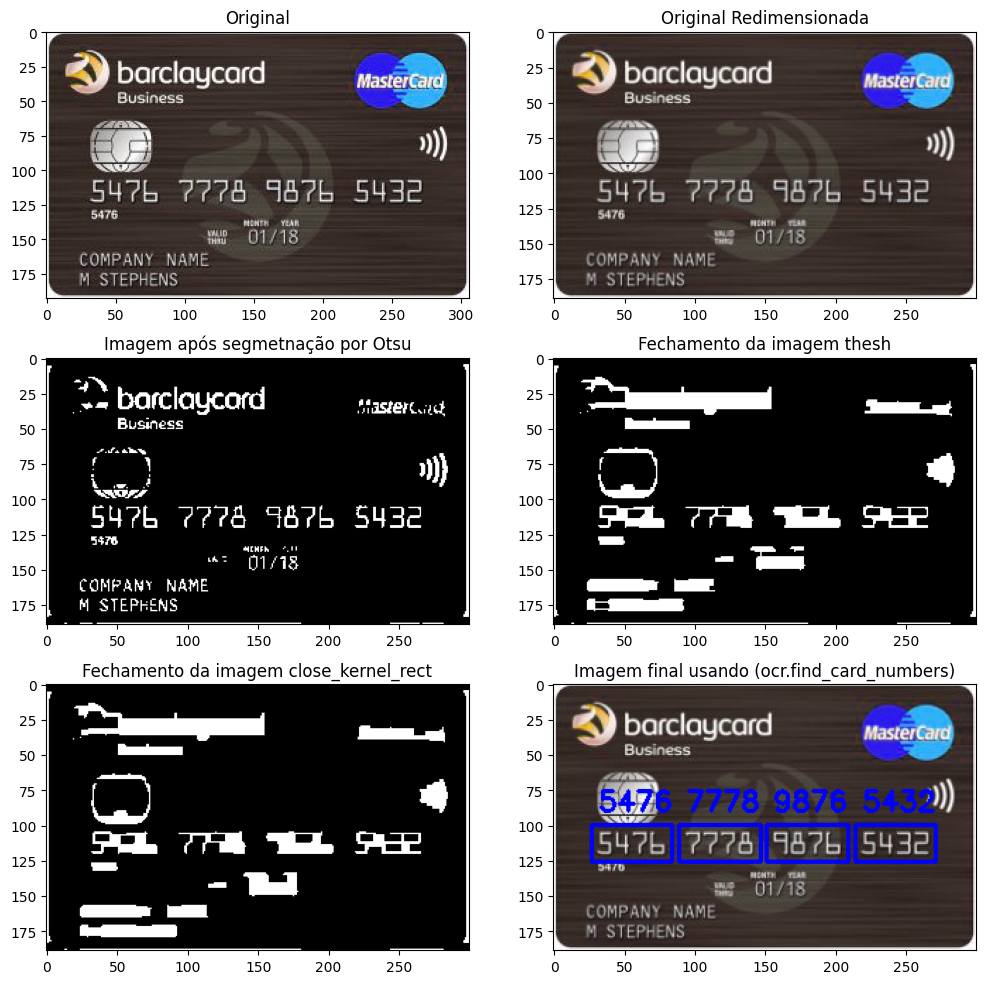

In [33]:
# O nome das diversas imagens:
# | "card2.png" | "card3.png" | "card4.jpg" |

from ocr_functions import ocr_Helper

# Função que nos auxiliará a classificar os dígitos
ocr = ocr_Helper()

## -- Seu código começa AQUI -- ##

#Lendo a imagem card's
img_card1 = cv.imread("card1.jpg",1)
img_card2 = cv.imread("card2.png",1)
img_card3 = cv.imread("card3.png",1)
img_card4 = cv.imread("card4.jpg",1)

#Escolhendo qual imagem será analisada

img_card = img_card1

# Redimensionando a Imagem

nova_altura  = 300
nova_largura = 189
novo_dimensao = (nova_altura, nova_largura)
img_card_redi = cv.resize(img_card, novo_dimensao)

# Convertendo para Níveis de Cinza
image_gray = cv.cvtColor(img_card_redi, cv.COLOR_BGR2GRAY)


#Criação dos elementos estruturantes

# Elemento Estruturante Retangular 9x3
elem_retan_9_3 = cv.getStructuringElement(cv.MORPH_RECT, (9,3))

# Elemento Estruturante Quadrado 5x5
elem_quadr_5_5  = np.ones((5,5),np.uint8)

## -- Seu código termina AQUI -- ##

image_rgb = img_card_redi

# Operação morfológica que resulta na diferença entre uma abertura e a
# imagem original.
tophat = cv.morphologyEx(image_gray, cv.MORPH_TOPHAT, elem_retan_9_3)

# Segmentação pelo método de Otsu
thresh = cv.threshold(tophat, 0, 255,cv.THRESH_BINARY | cv.THRESH_OTSU)[1]   #Segmenta os números, porém não só os números

## -- Seu código começa AQUI -- ##

# Operação de fechamento em Thresh
close_kernel_rect = cv.morphologyEx(thresh,cv.MORPH_CLOSE,elem_retan_9_3)

# Operação de fechamento em close_kernel_rect
mask = cv.morphologyEx(close_kernel_rect,cv.MORPH_CLOSE,elem_quadr_5_5 )

## -- Seu código termina AQUI -- ##

image_out = ocr.find_card_numbers(image_rgb, image_gray, mask)


## -- Seu código começa AQUI -- ##

# Plotando todas as imagens

plt.figure(figsize = (12,12))
plt.subplot(3,2,1)
plt.title("Original")
plt.imshow(img_card)

plt.subplot(3,2,2)
plt.imshow(img_card_redi)
plt.title("Original Redimensionada")

plt.subplot(3,2,3)
plt.imshow(thresh, cmap = "gray")
plt.title("Imagem após segmetnação por Otsu")

plt.subplot(3,2,4)
plt.imshow(close_kernel_rect, cmap = "gray")
plt.title("Fechamento da imagem thesh")

plt.subplot(3,2,5)
plt.imshow(mask, cmap = "gray")
plt.title("Fechamento da imagem close_kernel_rect")

plt.subplot(3,2,6)
plt.imshow(image_out, cmap = "gray")
plt.title("Imagem final usando (ocr.find_card_numbers)")

plt.show()

## -- Seu código termina AQUI -- ##

Analisando as imagens fornecidas é possível concluir que o método proposto conseguiu identificar corretamente as regiões e os números do cartão 1. Em relação ao cartão 2, a aplicação das operações de fechamento com os elementos estruturantes utilizados não foi ideal, fazendo com que a região dos números do cartão se distorcessem, de forma que ao se aplicar a função ocr.find_card_numbers o algoritmo identificasse outros números de forma errônea. Em relação a imagem do cartão 3, o processo de fechamento com os elementos estruturantes utilizados conseguiu fazer com que o algoritmo do ocr conseguisse identificar os números do cartão, porém outras partes da figura também foram identificadas como números, como por exemplo o nome SMITH e a barra ("/") da data de validade do cartão, que foi identificado como um número 7. Por fim, em relação à imagem do cartão 4, a operação de fechamento utilizada não foi suficiente para identificar os números do cartão na região de interesse, uma vez que os números foram também identificados errados e a região da palavra "world" também foi reconhecida como número.

Assim, é possível concluir que o algoritmo proposto não consegue generalizar o problema de reconhecimento de números do cartão, uma vez que ele é fortemente dependente da aplicação das operações de fechamento, de forma a ser necessário alterar o formato e tamanho dos elementos estruturantes, de acordo com o tipo de cartão de interesse para a identificação, para que o formato das regiões numéricas sejam segmentadas exclusivamente em relação às outras regiões, fazendo com que o algoritmo reconheça corretamente, sem haver distorções, o número do cartão